<b>The data set is concerned with the unemployment data of the state of new york, based on regions and ethnicity from the year 2012 to 2019.</b> <br>
<b>Main questions answered :</b><br>
1- What is the unemployment rate for each region over the years and is it rising or declining?<br>
2- What is the percentage of the population covered in each region?<br>
3-What is the unemployment rate for each ethnicity over the years?<br>
4-How each ethnicity is performing compared with the others?<br>
5-What is the growth rate of all the ethnicities over the years?

In [2]:
# setting the library needed for cleaning and manipulating the data set
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading and displaying the data set, the data set is from data.gov (Labor Force Status by Race and Ethnicity: Beginning 2012)
# link : https://catalog.data.gov/dataset/labor-force-status-by-race-and-ethnicity-beginning-2012
Main_table= pd.read_csv('Labor_Force_Status_by_Race_and_Ethnicity__Beginning_2012.csv')
Main_table

,Year,Region,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,...,Black or African American Alone Unemployed,Black or African American Alone Unemployment Rate,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate
0,2019,New York State,15897098,10079649,454091,4.51,10244956,6479094,234467,3.62,...,104044.0,6.86,1408062,904680,37418.0,4.14,2850345,1873682,115299.0,6.15
1,2019,Capital Region,904449,571846,22250,3.89,769965,485684,16074,3.31,...,2058.0,5.57,33894,23335,NaN,NaN,41388,26974,1857.0,6.88
2,2019,Central New York,633385,394280,16952,4.30,547502,345890,13050,3.77,...,2037.0,8.25,16178,8235,NaN,NaN,22934,13541,1174.0,8.67
3,2019,Finger Lakes,986138,625096,25268,4.04,823730,525760,18211,3.46,...,4505.0,7.52,23737,15176,NaN,NaN,61865,39862,2998.0,7.52
4,2019,Hudson Valley,1867747,1194605,50868,4.26,1351854,851474,32071,3.77,...,8054.0,5.47,88725,60235,2949.0,4.90,352365,246564,13246.0,5.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2012,Mohawk Valley,404829,241831,22647,9.40,371111,224014,20443,9.10,...,NaN,NaN,6900,3382,NaN,NaN,16277,8996,1425.0,15.80
84,2012,New York City,6743863,4309156,459922,10.70,3054324,1968046,146944,7.50,...,157147.0,15.50,914691,577386,53909.0,9.30,1845965,1159042,146663.0,12.70
85,2012,North Country,354887,198477,22068,11.10,319918,183814,18896,10.30,...,NaN,NaN,4205,2547,NaN,NaN,11932,3835,NaN,NaN
86,2012,Southern Tier,541803,320169,25180,7.90,492933,297520,22750,7.60,...,845.0,11.90,19982,10191,NaN,NaN,13618,8176,1908.0,23.30


In [4]:
# get an overview of the data set
Main_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 22 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           88 non-null     int64  
 1   Region                                                         88 non-null     object 
 2   Total Population 16 Years and Older                            88 non-null     int64  
 3   Total Civilian Labor Force                                     88 non-null     int64  
 4   Total Unemployed                                               88 non-null     int64  
 5   Total Unemployment Rate                                        88 non-null     float64
 6   White Alone Population 16 Years and Older                      88 non-null     int64  
 7   White Alone Civilian Labor Force                               8

In [5]:
# check for the accuracy of the total columns
Main_table['Total Population 16 Years and Older']== (Main_table['White Alone Population 16 Years and Older']+Main_table['Black or African American Alone Population 16 Years and Older']+Main_table['Asian Alone Population 16 Years and Older']+Main_table['Hispanic or Latino Population 16 Years and Older'])

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Length: 88, dtype: bool

In [6]:
# all the population columns have no missing values but it is not accurate 

In [7]:
# updating the total column
Main_table['Total Population 16 Years and Older']= (Main_table['White Alone Population 16 Years and Older']+Main_table['Black or African American Alone Population 16 Years and Older']+Main_table['Asian Alone Population 16 Years and Older']+Main_table['Hispanic or Latino Population 16 Years and Older'])

In [8]:
# check for the accuracy of the total columns
Main_table['Total Population 16 Years and Older']== (Main_table['White Alone Population 16 Years and Older']+Main_table['Black or African American Alone Population 16 Years and Older']+Main_table['Asian Alone Population 16 Years and Older']+Main_table['Hispanic or Latino Population 16 Years and Older'])

0     True
1     True
2     True
3     True
4     True
      ... 
83    True
84    True
85    True
86    True
87    True
Length: 88, dtype: bool

In [9]:
#do the same for the labor columns
Main_table['Total Civilian Labor Force']= (Main_table['White Alone Civilian Labor Force']+Main_table['Black or African American Alone Civilian Labor Force']+Main_table['Asian Alone Civilian Labor Force']+Main_table['Hispanic or Latino Civilian Labor Force'])

In [10]:
# check for the accuracy of the labor force columns
Main_table['Total Civilian Labor Force']== (Main_table['White Alone Civilian Labor Force']+Main_table['Black or African American Alone Civilian Labor Force']+Main_table['Asian Alone Civilian Labor Force']+Main_table['Hispanic or Latino Civilian Labor Force'])

0     True
1     True
2     True
3     True
4     True
      ... 
83    True
84    True
85    True
86    True
87    True
Length: 88, dtype: bool

In [11]:
#checking for missing values in the data set 
Main_table.isnull().values.any()

True

In [12]:
# using existing values to calculate the missing values
# first the Total Population 16 Years and Older column does not equal the labor + unemployed columns
# there is uncovered data in the data set
Main_table['uncoverd']=(Main_table['Total Population 16 Years and Older']-(Main_table['Total Civilian Labor Force']+Main_table['Total Unemployed']))

In [13]:
#the coverage rate for each region
Main_table['coverage rate']=100-((Main_table['uncoverd']/Main_table['Total Population 16 Years and Older'])*100)

In [14]:
Main_table['coverage rate']= Main_table['coverage rate'].round(2)

In [15]:
Main_table

,Year,Region,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,...,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate,uncoverd,coverage rate
0,2019,New York State,16980312,10773123,454091,4.51,10244956,6479094,234467,3.62,...,1408062,904680,37418.0,4.14,2850345,1873682,115299.0,6.15,5753098,66.12
1,2019,Capital Region,904869,572957,22250,3.89,769965,485684,16074,3.31,...,33894,23335,NaN,NaN,41388,26974,1857.0,6.88,309662,65.78
2,2019,Central New York,630058,392343,16952,4.30,547502,345890,13050,3.77,...,16178,8235,NaN,NaN,22934,13541,1174.0,8.67,220763,64.96
3,2019,Finger Lakes,1010065,640686,25268,4.04,823730,525760,18211,3.46,...,23737,15176,NaN,NaN,61865,39862,2998.0,7.52,344111,65.93
4,2019,Hudson Valley,2026909,1305631,50868,4.26,1351854,851474,32071,3.77,...,88725,60235,2949.0,4.90,352365,246564,13246.0,5.37,670410,66.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2012,Mohawk Valley,406718,242388,22647,9.40,371111,224014,20443,9.10,...,6900,3382,NaN,NaN,16277,8996,1425.0,15.80,141683,65.16
84,2012,New York City,7439495,4720047,459922,10.70,3054324,1968046,146944,7.50,...,914691,577386,53909.0,9.30,1845965,1159042,146663.0,12.70,2259526,69.63
85,2012,North Country,351601,194939,22068,11.10,319918,183814,18896,10.30,...,4205,2547,NaN,NaN,11932,3835,NaN,NaN,134594,61.72
86,2012,Southern Tier,544782,323007,25180,7.90,492933,297520,22750,7.60,...,19982,10191,NaN,NaN,13618,8176,1908.0,23.30,196595,63.91


there are multiple missing values so interpolation with different methods gave unrealistic values.
the equation should be ue = p - l .
ue = unemployed .
p = population .
l = labor force .
uc = uncovered .
but because there is uncovered data the equation is : ue + uc = p - l .
because the covering rate for each region is known an estimation can be made with the rate for example :-
if p = 100 , l = 70 then (uc + ue ) = 30 .
and if this region covered 70% of the population an estimation can be made that of the remaining 30 , 30% uncoverd ,70% unemployed .
the result : uc = 9 , ue = 21 .
the equation used to estimate the missing values :
ue = (p - l)* coverage rate of the region in that year .

In [16]:
# the missing data can be filled with the population and the labor force and applying the coverage rate of the region
Main_table['Black or African American Alone Unemployed']=Main_table['Black or African American Alone Unemployed'].fillna((Main_table['Black or African American Alone Population 16 Years and Older']-Main_table['Black or African American Alone Civilian Labor Force'])*(Main_table['coverage rate']/100))

In [17]:
Main_table['Asian Alone Unemployed']= Main_table['Asian Alone Unemployed'].fillna((Main_table['Asian Alone Population 16 Years and Older']-Main_table['Asian Alone Civilian Labor Force'])*(Main_table['coverage rate']/100))

In [18]:
Main_table['Hispanic or Latino Unemployed']= Main_table['Hispanic or Latino Unemployed'].fillna((Main_table['Hispanic or Latino Population 16 Years and Older']-Main_table['Hispanic or Latino Civilian Labor Force'])*(Main_table['coverage rate']/100))

In [19]:
#rounding
Main_table['Black or African American Alone Unemployed']=Main_table['Black or African American Alone Unemployed'].round()

In [20]:
Main_table['Asian Alone Unemployed']=Main_table['Asian Alone Unemployed'].round()

In [21]:
Main_table['Hispanic or Latino Unemployed']=Main_table['Hispanic or Latino Unemployed'].round()

In [22]:
Main_table

,Year,Region,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,...,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate,uncoverd,coverage rate
0,2019,New York State,16980312,10773123,454091,4.51,10244956,6479094,234467,3.62,...,1408062,904680,37418.0,4.14,2850345,1873682,115299.0,6.15,5753098,66.12
1,2019,Capital Region,904869,572957,22250,3.89,769965,485684,16074,3.31,...,33894,23335,6946.0,NaN,41388,26974,1857.0,6.88,309662,65.78
2,2019,Central New York,630058,392343,16952,4.30,547502,345890,13050,3.77,...,16178,8235,5160.0,NaN,22934,13541,1174.0,8.67,220763,64.96
3,2019,Finger Lakes,1010065,640686,25268,4.04,823730,525760,18211,3.46,...,23737,15176,5644.0,NaN,61865,39862,2998.0,7.52,344111,65.93
4,2019,Hudson Valley,2026909,1305631,50868,4.26,1351854,851474,32071,3.77,...,88725,60235,2949.0,4.90,352365,246564,13246.0,5.37,670410,66.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2012,Mohawk Valley,406718,242388,22647,9.40,371111,224014,20443,9.10,...,6900,3382,2292.0,NaN,16277,8996,1425.0,15.80,141683,65.16
84,2012,New York City,7439495,4720047,459922,10.70,3054324,1968046,146944,7.50,...,914691,577386,53909.0,9.30,1845965,1159042,146663.0,12.70,2259526,69.63
85,2012,North Country,351601,194939,22068,11.10,319918,183814,18896,10.30,...,4205,2547,1023.0,NaN,11932,3835,4997.0,NaN,134594,61.72
86,2012,Southern Tier,544782,323007,25180,7.90,492933,297520,22750,7.60,...,19982,10191,6257.0,NaN,13618,8176,1908.0,23.30,196595,63.91


In [23]:
#fill the uneployment rate 
Main_table['Black or African American Alone Unemployment Rate']=(Main_table['Black or African American Alone Unemployed']/Main_table['Black or African American Alone Population 16 Years and Older'])*100

In [24]:
Main_table['Asian Alone Unemployment Rate']=(Main_table['Asian Alone Unemployed']/Main_table['Asian Alone Population 16 Years and Older'])*100

In [25]:
Main_table['Hispanic or Latino Unemployment Rate']=(Main_table['Hispanic or Latino Unemployed']/Main_table['Hispanic or Latino Population 16 Years and Older'])*100

In [26]:
#rounding
Main_table['Black or African American Alone Unemployment Rate']=Main_table['Black or African American Alone Unemployment Rate'].round(2)

In [27]:
Main_table['Asian Alone Unemployment Rate']=Main_table['Asian Alone Unemployment Rate'].round(2)

In [28]:
Main_table['Hispanic or Latino Unemployment Rate']=Main_table['Hispanic or Latino Unemployment Rate'].round(2)

In [29]:
Main_table

,Year,Region,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,...,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate,uncoverd,coverage rate
0,2019,New York State,16980312,10773123,454091,4.51,10244956,6479094,234467,3.62,...,1408062,904680,37418.0,2.66,2850345,1873682,115299.0,4.05,5753098,66.12
1,2019,Capital Region,904869,572957,22250,3.89,769965,485684,16074,3.31,...,33894,23335,6946.0,20.49,41388,26974,1857.0,4.49,309662,65.78
2,2019,Central New York,630058,392343,16952,4.30,547502,345890,13050,3.77,...,16178,8235,5160.0,31.90,22934,13541,1174.0,5.12,220763,64.96
3,2019,Finger Lakes,1010065,640686,25268,4.04,823730,525760,18211,3.46,...,23737,15176,5644.0,23.78,61865,39862,2998.0,4.85,344111,65.93
4,2019,Hudson Valley,2026909,1305631,50868,4.26,1351854,851474,32071,3.77,...,88725,60235,2949.0,3.32,352365,246564,13246.0,3.76,670410,66.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2012,Mohawk Valley,406718,242388,22647,9.40,371111,224014,20443,9.10,...,6900,3382,2292.0,33.22,16277,8996,1425.0,8.75,141683,65.16
84,2012,New York City,7439495,4720047,459922,10.70,3054324,1968046,146944,7.50,...,914691,577386,53909.0,5.89,1845965,1159042,146663.0,7.95,2259526,69.63
85,2012,North Country,351601,194939,22068,11.10,319918,183814,18896,10.30,...,4205,2547,1023.0,24.33,11932,3835,4997.0,41.88,134594,61.72
86,2012,Southern Tier,544782,323007,25180,7.90,492933,297520,22750,7.60,...,19982,10191,6257.0,31.31,13618,8176,1908.0,14.01,196595,63.91


In [30]:
Main_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           88 non-null     int64  
 1   Region                                                         88 non-null     object 
 2   Total Population 16 Years and Older                            88 non-null     int64  
 3   Total Civilian Labor Force                                     88 non-null     int64  
 4   Total Unemployed                                               88 non-null     int64  
 5   Total Unemployment Rate                                        88 non-null     float64
 6   White Alone Population 16 Years and Older                      88 non-null     int64  
 7   White Alone Civilian Labor Force                               8

In [31]:
#summary of the edited data set
Main_table.describe()

,Year,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,Black or African American Alone Population 16 Years and Older,...,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate,uncoverd,coverage rate
count,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000,8.800000e+01,...,8.800000e+01,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000,8.800000e+01,88.000000
mean,2015.500000,3.099292e+06,1.956729e+06,120374.681818,6.290455,1.896562e+06,1.199249e+06,63762.090909,5.490000,4.468045e+05,...,2.477148e+05,157067.136364,11157.818182,16.369318,5.082115e+05,3.272861e+05,28773.829545,12.408295,1.022189e+06,65.293295
std,2.304419,4.857502e+06,3.071447e+06,200090.595967,1.751819,2.817572e+06,1.786409e+06,99586.215346,1.588652,7.861710e+05,...,4.507401e+05,286324.467275,15817.128366,12.284652,9.007882e+05,5.751476e+05,50608.506637,11.386601,1.595843e+06,3.582623
min,2012.000000,3.387410e+05,1.737990e+05,7703.000000,3.300000,3.052830e+05,1.652900e+05,6804.000000,3.000000,1.243000e+04,...,3.600000e+03,1682.000000,526.000000,1.350000,1.185900e+04,3.124000e+03,1011.000000,2.400000,1.345940e+05,53.970000
25%,2013.750000,5.442380e+05,3.150078e+05,21509.750000,4.940000,4.890602e+05,2.893770e+05,17245.250000,4.345000,2.008550e+04,...,1.664075e+04,8237.250000,2157.750000,3.392500,1.827750e+04,1.075350e+04,2669.500000,5.020000,2.086072e+05,63.437500
50%,2015.500000,1.011056e+06,6.395985e+05,33104.000000,5.995000,8.333755e+05,5.293745e+05,24286.500000,5.200000,9.805000e+04,...,2.753700e+04,16123.500000,4868.000000,21.175000,4.570350e+04,2.744600e+04,4709.500000,6.890000,3.431645e+05,66.310000
75%,2017.250000,2.479608e+06,1.619360e+06,79446.000000,7.600000,1.748771e+06,1.114454e+06,54320.500000,6.650000,2.195990e+05,...,1.361392e+05,88624.750000,8250.000000,27.230000,3.541712e+05,2.533192e+05,16283.000000,15.947500,7.501655e+05,67.442500
max,2019.000000,1.728452e+07,1.087916e+07,932052.000000,11.100000,1.055309e+07,6.723125e+06,504234.000000,10.300000,2.512824e+06,...,1.446000e+06,916063.000000,65494.000000,39.450000,2.888062e+06,1.873682e+06,202397.000000,42.680000,5.847433e+06,71.460000


In [32]:
#changing the format of the display
pd.options.display.float_format='{:.2f}'.format

In [33]:
Main_table.describe()

,Year,Total Population 16 Years and Older,Total Civilian Labor Force,Total Unemployed,Total Unemployment Rate,White Alone Population 16 Years and Older,White Alone Civilian Labor Force,White Alone Unemployed,White Alone Unemployment Rate,Black or African American Alone Population 16 Years and Older,...,Asian Alone Population 16 Years and Older,Asian Alone Civilian Labor Force,Asian Alone Unemployed,Asian Alone Unemployment Rate,Hispanic or Latino Population 16 Years and Older,Hispanic or Latino Civilian Labor Force,Hispanic or Latino Unemployed,Hispanic or Latino Unemployment Rate,uncoverd,coverage rate
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,...,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,2015.50,3099292.41,1956729.16,120374.68,6.29,1896561.59,1199248.91,63762.09,5.49,446804.52,...,247714.84,157067.14,11157.82,16.37,508211.45,327286.11,28773.83,12.41,1022188.57,65.29
std,2.30,4857502.20,3071446.58,200090.60,1.75,2817571.94,1786409.49,99586.22,1.59,786171.01,...,450740.11,286324.47,15817.13,12.28,900788.16,575147.58,50608.51,11.39,1595843.47,3.58
min,2012.00,338741.00,173799.00,7703.00,3.30,305283.00,165290.00,6804.00,3.00,12430.00,...,3600.00,1682.00,526.00,1.35,11859.00,3124.00,1011.00,2.40,134594.00,53.97
25%,2013.75,544238.00,315007.75,21509.75,4.94,489060.25,289377.00,17245.25,4.35,20085.50,...,16640.75,8237.25,2157.75,3.39,18277.50,10753.50,2669.50,5.02,208607.25,63.44
50%,2015.50,1011056.00,639598.50,33104.00,6.00,833375.50,529374.50,24286.50,5.20,98050.00,...,27537.00,16123.50,4868.00,21.17,45703.50,27446.00,4709.50,6.89,343164.50,66.31
75%,2017.25,2479607.75,1619360.00,79446.00,7.60,1748771.25,1114454.25,54320.50,6.65,219599.00,...,136139.25,88624.75,8250.00,27.23,354171.25,253319.25,16283.00,15.95,750165.50,67.44
max,2019.00,17284516.00,10879161.00,932052.00,11.10,10553089.00,6723125.00,504234.00,10.30,2512824.00,...,1446000.00,916063.00,65494.00,39.45,2888062.00,1873682.00,202397.00,42.68,5847433.00,71.46


In [34]:
#set the background for the plots
sns.set_theme()
sns.set_context('paper')

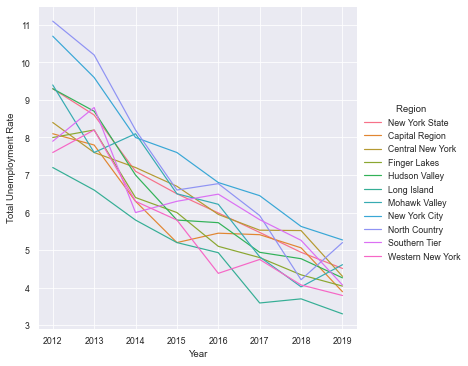

In [35]:
# how is each region is preforming over the years 
sns.relplot(x='Year',y='Total Unemployment Rate',hue='Region ',kind='line',data=Main_table)

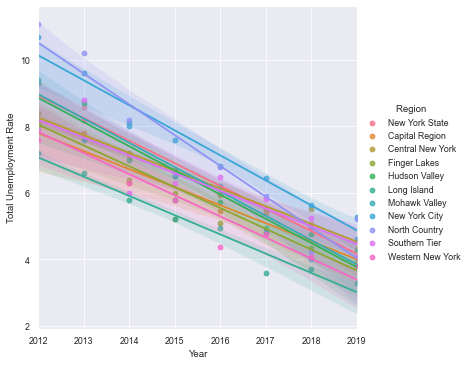

In [36]:
sns.lmplot(x='Year',y='Total Unemployment Rate',hue='Region ',data=Main_table)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Capital Region'),
  Text(1, 0, 'Central New York'),
  Text(2, 0, 'Finger Lakes'),
  Text(3, 0, 'Hudson Valley'),
  Text(4, 0, 'Long Island'),
  Text(5, 0, 'Mohawk Valley'),
  Text(6, 0, 'New York City'),
  Text(7, 0, 'New York State'),
  Text(8, 0, 'North Country'),
  Text(9, 0, 'Southern Tier'),
  Text(10, 0, 'Western New York')])

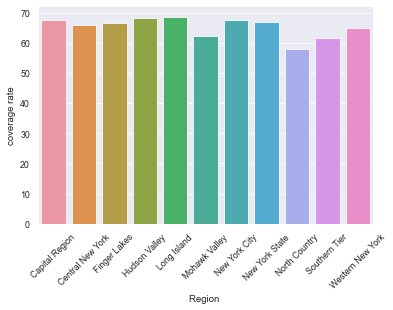

In [37]:
#how much each region covered its population in the report
g1=Main_table.groupby('Region ').mean()
g1.reset_index(inplace=True)
sns.barplot(x='Region ',y='coverage rate',data=g1)
plt.xticks(rotation=45)

In [38]:
#new table with only the unemployment rates
Sub_table=Main_table[['Year','Region ','White Alone Unemployment Rate','Black or African American Alone Unemployment Rate','Asian Alone Unemployment Rate','Hispanic or Latino Unemployment Rate']]

In [39]:
#gitting rid of the state(the sum of regions) so it will not affect the next plots that use the mean of the data
Sub_table= Sub_table.loc[Sub_table['Region ']!='New York State']

In [40]:
Sub_table

,Year,Region,White Alone Unemployment Rate,Black or African American Alone Unemployment Rate,Asian Alone Unemployment Rate,Hispanic or Latino Unemployment Rate
1,2019,Capital Region,3.31,3.45,20.49,4.49
2,2019,Central New York,3.77,4.69,31.90,5.12
3,2019,Finger Lakes,3.46,4.47,23.78,4.85
4,2019,Hudson Valley,3.77,3.44,3.32,3.76
5,2019,Long Island,3.00,3.75,1.64,2.94
...,...,...,...,...,...,...
83,2012,Mohawk Valley,9.10,33.72,33.22,8.75
84,2012,New York City,7.50,9.67,5.89,7.95
85,2012,North Country,10.30,42.89,24.33,41.88
86,2012,Southern Tier,7.60,4.63,31.31,14.01


In [41]:
#transforming the table to compare all the ethnicity against each other
Sub_table_g=Sub_table.groupby('Year').mean()
Sub_table_g

,White Alone Unemployment Rate,Black or African American Alone Unemployment Rate,Asian Alone Unemployment Rate,Hispanic or Latino Unemployment Rate
Year,,,,
2012,7.81,14.67,19.46,11.69
2013,7.38,13.04,15.59,12.36
2014,6.10,10.88,15.61,14.86
2015,5.35,10.85,19.62,15.88
2016,5.04,12.56,15.04,10.60
2017,4.57,12.75,19.96,15.38
2018,4.02,11.80,16.81,11.68
2019,3.79,13.33,19.11,12.39


In [42]:
Sub_table_g.reset_index(inplace=True)

In [43]:
Sub_table_g

,Year,White Alone Unemployment Rate,Black or African American Alone Unemployment Rate,Asian Alone Unemployment Rate,Hispanic or Latino Unemployment Rate
0,2012,7.81,14.67,19.46,11.69
1,2013,7.38,13.04,15.59,12.36
2,2014,6.10,10.88,15.61,14.86
3,2015,5.35,10.85,19.62,15.88
4,2016,5.04,12.56,15.04,10.60
5,2017,4.57,12.75,19.96,15.38
6,2018,4.02,11.80,16.81,11.68
7,2019,3.79,13.33,19.11,12.39


In [44]:
Ethnicity_data=pd.melt(Sub_table_g,id_vars=['Year'],var_name='Ethnicity',value_name='Unemployment Rate')

In [45]:
Ethnicity_data

,Year,Ethnicity,Unemployment Rate
0,2012,White Alone Unemployment Rate,7.81
1,2013,White Alone Unemployment Rate,7.38
2,2014,White Alone Unemployment Rate,6.10
3,2015,White Alone Unemployment Rate,5.35
4,2016,White Alone Unemployment Rate,5.04
5,2017,White Alone Unemployment Rate,4.57
6,2018,White Alone Unemployment Rate,4.02
7,2019,White Alone Unemployment Rate,3.79
8,2012,Black or African American Alone Unemployment Rate,14.67
9,2013,Black or African American Alone Unemployment Rate,13.04


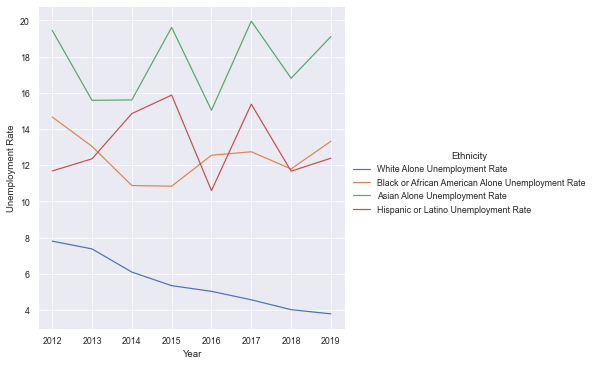

In [46]:
sns.relplot(x='Year',y='Unemployment Rate',hue='Ethnicity',data=Ethnicity_data,kind='line')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Asian Alone Unemployment Rate'),
  Text(1, 0, 'Black or African American Alone Unemployment Rate'),
  Text(2, 0, 'Hispanic or Latino Unemployment Rate'),
  Text(3, 0, 'White Alone Unemployment Rate')])

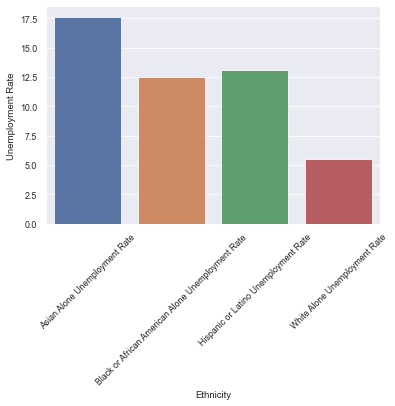

In [47]:
g2=Ethnicity_data.groupby('Ethnicity').mean()
g2.reset_index(inplace=True)
sns.barplot(x='Ethnicity',y='Unemployment Rate',data=g2)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'White Alone Unemployment Rate'),
  Text(1, 0, 'Black or African American Alone Unemployment Rate'),
  Text(2, 0, 'Asian Alone Unemployment Rate'),
  Text(3, 0, 'Hispanic or Latino Unemployment Rate')])

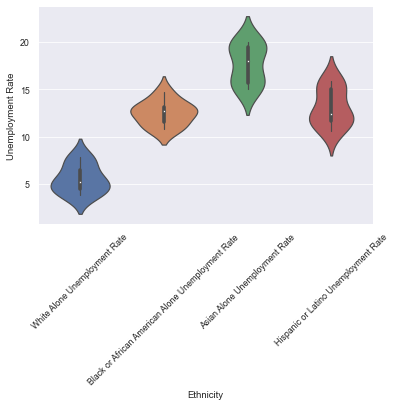

In [48]:
sns.violinplot(x='Ethnicity',y='Unemployment Rate',data=Ethnicity_data)
plt.xticks(rotation=45)

In [49]:
#new 2 tables to study the growth rate of the labor force & unemployed population
Sub_labor=Main_table[['Year','Region ','White Alone Civilian Labor Force','Black or African American Alone Civilian Labor Force','Asian Alone Civilian Labor Force','Hispanic or Latino Civilian Labor Force']]

In [50]:
Sub_unemployed=Main_table[['Year','Region ','White Alone Unemployed','Black or African American Alone Unemployed','Asian Alone Unemployed','Hispanic or Latino Unemployed']]

In [51]:
#transforming the tables summing all the regions per year for each ethnicity
Sub_labor=Sub_labor.groupby('Year').sum()

In [52]:
Sub_unemployed=Sub_unemployed.groupby('Year').sum()

In [53]:
Sub_labor.reset_index(inplace=True)

In [54]:
Sub_unemployed.reset_index(inplace=True)

In [55]:
Sub_labor

,Year,White Alone Civilian Labor Force,Black or African American Alone Civilian Labor Force,Asian Alone Civilian Labor Force,Hispanic or Latino Civilian Labor Force
0,2012,13446250,2966426,1566584,3449868
1,2013,13396374,2951478,1637030,3487700
2,2014,13309624,3000506,1679490,3539256
3,2015,13255494,3016150,1758994,3605346
4,2016,13109642,2987006,1742988,3636122
5,2017,13139234,3058854,1832126,3728108
6,2018,12919098,3023422,1795336,3607414
7,2019,12958188,3031334,1809360,3747364


In [56]:
Sub_unemployed

,Year,White Alone Unemployed,Black or African American Alone Unemployed,Asian Alone Unemployed,Hispanic or Latino Unemployed
0,2012,1008468,455898.00,154253.00,408916.00
1,2013,947458,416827.00,134262.00,398426.00
2,2014,793028,344586.00,121533.00,324087.00
3,2015,685368,343148.00,136556.00,327250.00
4,2016,619562,305075.00,109571.00,299593.00
5,2017,572930,298143.00,112720.00,287926.00
6,2018,515316,255812.00,106645.00,235964.00
7,2019,468934,222460.00,106348.00,249935.00


In [57]:
#changing the format of the display
pd.options.display.float_format='{:.4f}'.format

In [58]:
#exclude the year column before applying .pct_change function (other solution changing the data type of the year column)
year=DataFrame(Sub_labor,columns=['Year'])

In [59]:
Sub_labor1=DataFrame(Sub_labor,columns=['White Alone Civilian Labor Force','Black or African American Alone Civilian Labor Force','Asian Alone Civilian Labor Force','Hispanic or Latino Civilian Labor Force'])

In [60]:
Sub_unemployed1=DataFrame(Sub_unemployed,columns=['White Alone Unemployed','Black or African American Alone Unemployed','Asian Alone Unemployed','Hispanic or Latino Unemployed'])

In [61]:
#calculating the growth rate over the years for each ethnicity
Sub_labor_change=Sub_labor1.pct_change()

In [62]:
Sub_unemployed_change=Sub_unemployed1.pct_change()

In [63]:
Sub_labor_change=year.join(Sub_labor_change)
Sub_labor_change

,Year,White Alone Civilian Labor Force,Black or African American Alone Civilian Labor Force,Asian Alone Civilian Labor Force,Hispanic or Latino Civilian Labor Force
0,2012,nan,nan,nan,nan
1,2013,-0.0037,-0.0050,0.0450,0.0110
2,2014,-0.0065,0.0166,0.0259,0.0148
3,2015,-0.0041,0.0052,0.0473,0.0187
4,2016,-0.0110,-0.0097,-0.0091,0.0085
5,2017,0.0023,0.0241,0.0511,0.0253
6,2018,-0.0168,-0.0116,-0.0201,-0.0324
7,2019,0.0030,0.0026,0.0078,0.0388


In [64]:
Sub_unemployed_change=year.join(Sub_unemployed_change)
Sub_unemployed_change

,Year,White Alone Unemployed,Black or African American Alone Unemployed,Asian Alone Unemployed,Hispanic or Latino Unemployed
0,2012,nan,nan,nan,nan
1,2013,-0.0605,-0.0857,-0.1296,-0.0257
2,2014,-0.1630,-0.1733,-0.0948,-0.1866
3,2015,-0.1358,-0.0042,0.1236,0.0098
4,2016,-0.0960,-0.1110,-0.1976,-0.0845
5,2017,-0.0753,-0.0227,0.0287,-0.0389
6,2018,-0.1006,-0.1420,-0.0539,-0.1805
7,2019,-0.0900,-0.1304,-0.0028,0.0592


In [65]:
labor_per_e=pd.melt(Sub_labor_change,id_vars=['Year'],var_name='Ethnicity',value_name='+,- groth rate')

In [66]:
unemployed_per_e=pd.melt(Sub_unemployed_change,id_vars=['Year'],var_name='Ethnicity',value_name='+,- groth rate')

Text(0.5, 1.0, 'unemployment groth rate')

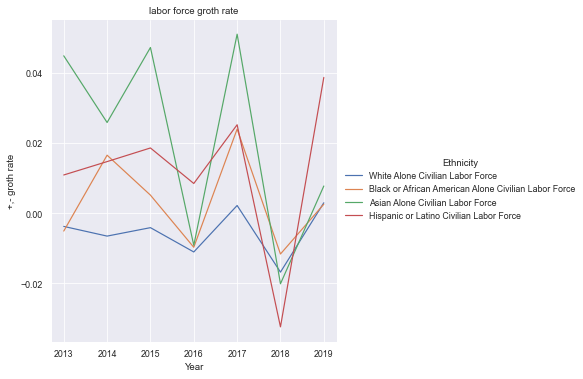

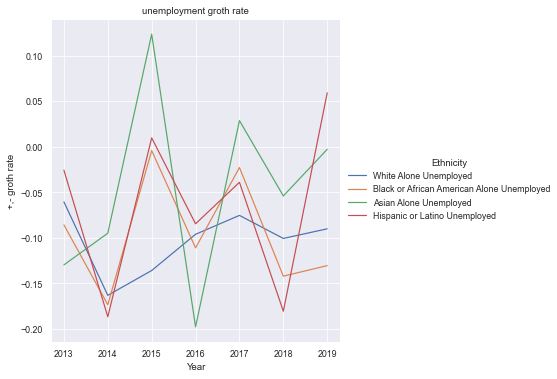

In [73]:
sns.relplot(x='Year',y='+,- groth rate',hue='Ethnicity',kind='line',data=labor_per_e)
plt.title('labor force growth rate')
sns.relplot(x='Year',y='+,- groth rate',hue='Ethnicity',kind='line',data=unemployed_per_e)
plt.title('unemployment growth rate')

Text(0.5, 1.0, 'unemployment groth rate')

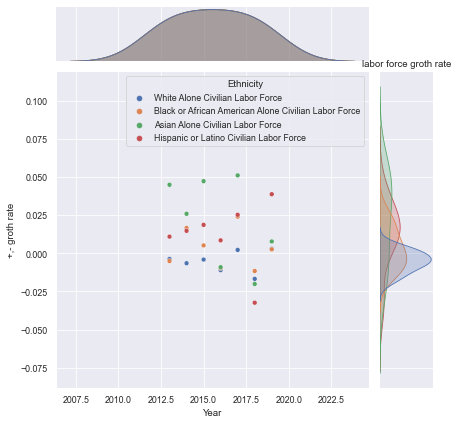

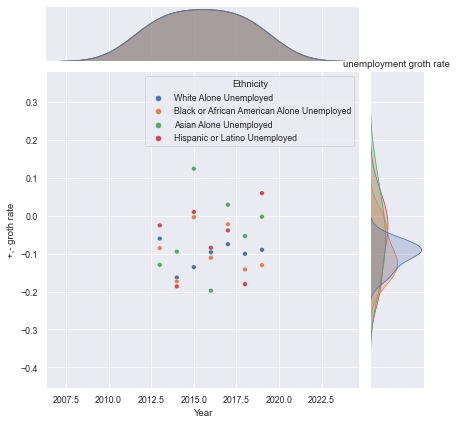

In [81]:
sns.jointplot(x='Year',y='+,- groth rate',hue='Ethnicity',data=labor_per_e)
plt.title('labor force growth rate')
sns.jointplot(x='Year',y='+,- groth rate',hue='Ethnicity',data=unemployed_per_e)
plt.title('unemployment growth rate')